In [14]:
# Import pandas
import pandas as pd

In [15]:
# Load in the listings data
df=pd.read_csv('data/listings.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,75,1,340,2020-08-01,4.75,1,265
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,14,1,2014-01-02,0.01,1,295
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,65,2,473,2020-03-15,3.44,1,340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46522,44807522,Designer Gramercy Studio Townhouse by UNSQ,12941925,Brian,Manhattan,Gramercy,40.73433,-73.98383,Entire home/apt,145,7,0,NaN,NaN,1,164
46523,44807786,Cozy & comfy apt in the heart of Inwood Manhattan,284790520,Salar,Manhattan,Washington Heights,40.85820,-73.92733,Entire home/apt,87,6,0,NaN,NaN,2,85
46524,44811717,Comfortable safe environment 24hr security camera,362453686,Nicole,Brooklyn,East Flatbush,40.65399,-73.93287,Private room,59,3,0,NaN,NaN,1,90
46525,44814944,Upper West Side studio 86th Street,4039777,Fernando,Manhattan,Upper West Side,40.78731,-73.97029,Entire home/apt,80,30,0,NaN,NaN,1,113


####  Exercise 1: Create a bar chart and dataframe of top 10 Neigborhoods that have the most expensive listsings on average. 
Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods.
This is a little dubious - we assign "expensive" by calculating the average cost of 
an AirBnB in each neighborhood.

1. Make a dataframe that sorts the neighborhood field by decending price.  
1. Use head to cut back top the top 10
1. Use pandas.plot.barh to generate a histogram (see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) wiki for details on pandas.plot.barh)
1. Display the data that you used to create the bar chart as a table with neighborhood and average price as the columns.  You want this to match the pivot that you create in youur dashboard

neighbourhood
Fort Wadsworth        800.000000
Woodrow               700.000000
Sea Gate              418.230769
Tribeca               381.107143
Flatiron District     367.415584
Briarwood             366.162162
Financial District    335.385057
Willowbrook           309.000000
Tottenville           309.000000
Prince's Bay          300.000000
Name: price, dtype: float64


<Axes: ylabel='neighbourhood'>

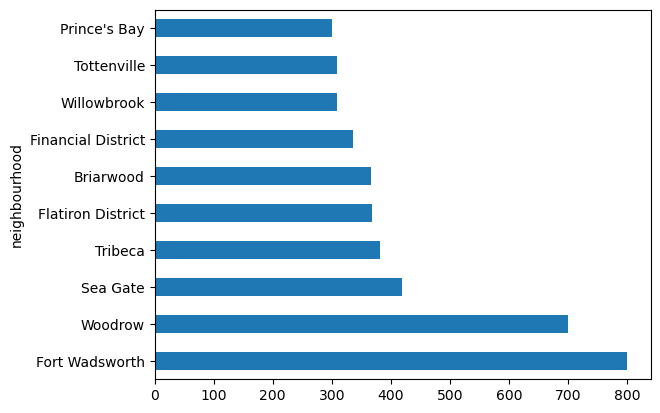

In [16]:
# our goal is to make a chart reflecting the top 10 most expensive Neighborhoods
# This is a little dubious - we assign "expensive" by calculating the average cost of 
# an AirBnB in each neighborhood, then we take the top ten and weight each slice 
# by the average value.
#
# make a dataframe that sorts the neighborhood field by decending price.  
# Use head to cut back top the top 10. Then, use df.plot.barh to generate a histogram.
top_10 = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
print(top_10)

top_10.plot.barh(x='neighbourhood', y='price')



In [17]:
# Now, display the top 10 datframe you created as a table with columns
# neighbourhood and price
print(type(top_10))
print(top_10)
top_10_df = top_10.reset_index()
top_10_df.columns = ['neighbourhood', 'price']  # rename columns
#note to self this also converted the series back to a dataframe - as long as the df doesn't havemore then one column 


print(type(top_10_df))
top_10_df

<class 'pandas.core.series.Series'>
neighbourhood
Fort Wadsworth        800.000000
Woodrow               700.000000
Sea Gate              418.230769
Tribeca               381.107143
Flatiron District     367.415584
Briarwood             366.162162
Financial District    335.385057
Willowbrook           309.000000
Tottenville           309.000000
Prince's Bay          300.000000
Name: price, dtype: float64
<class 'pandas.core.frame.DataFrame'>


,neighbourhood,price
0,Fort Wadsworth,800.000000
1,Woodrow,700.000000
2,Sea Gate,418.230769
3,Tribeca,381.107143
4,Flatiron District,367.415584
5,Briarwood,366.162162
6,Financial District,335.385057
7,Willowbrook,309.000000
8,Tottenville,309.000000
9,Prince's Bay,300.000000


####  Exercise 2: Create a bar chart and dataframe of top 10 Neigborhoods that have the LEAST expensive listsings on average. 

Do the same thing you just did, but get the 10 least expensive neighborhoods.  Sort them from lowest average price to highest.  Bew wure to provide a pivot table.

In [18]:
# Here we make the same chart using the bottom 10 Neighborhoods
# by average price.  We sort ascending in this one.
#changwe the sort order to ascending
top_10_least = df.groupby('neighbourhood')['price'].mean().sort_values().head(10)
pivot_table = pd.pivot_table(data=df, values='price', index='neighbourhood', fill_value=0)
pivot_table.head(10)

,price
neighbourhood,
Allerton,92.813953
Arden Heights,119.200000
Arrochar,125.050000
Arverne,249.070423
Astoria,97.297483
Bath Beach,92.789474
Battery Park City,237.166667
Bay Ridge,99.516340
Bay Terrace,110.200000


In [19]:
# we also would like to have the corresponding pivot table of the lowest 10

pivot_table = pd.pivot_table(data=df, values='price', index='neighbourhood', fill_value=0)
pivot_table.tail(10)

,price
neighbourhood,
Westerleigh,92.500000
Whitestone,120.583333
Williamsbridge,111.888889
Williamsburg,132.449799
Willowbrook,309.000000
Windsor Terrace,129.744828
Woodhaven,71.989362
Woodlawn,99.166667
Woodrow,700.000000


#  Now make all four widgets (the two charts and the two dataframes) in a Tableau dashboard!